In [ ]:
# import image module from pillow
from PIL import Image

# open the image
Image1 = Image.open('D:\cat.jpg')

# make a copy the image so that the
# original image does not get affected
Image1copy = Image1.copy()
Image2 = Image.open('D:\core.jpg')
Image2copy = Image2.copy()

# paste image giving dimensions
Image1copy.paste(Image2copy, (0, 0))

# save the image
Image1copy.save('D:\pasted2.png')


In [ ]:
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [ ]:
# Original image, which is the background
print("1.moon")
print("2.mountains")
print("3.desert")
print("4.lonely house")

bkgr_no=int(input("enter the choice: "))

if bkgr_no==1:
  background = cv2.imread('/content/drive/MyDrive/moon.jpg')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  n=random.randint(200,900)
  m=random.randint(200,600)
elif bkgr_no==2:
  background = cv2.imread('/content/drive/MyDrive/background.jpg')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  n=random.randint(150,700)
  m=random.randint(600,700)
elif bkgr_no==3:
  background = cv2.imread('/content/drive/MyDrive/desert.jpg')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  n=random.randint(100,350)
  m=random.randint(140,225)
elif bkgr_no==4:
  background = cv2.imread('/content/drive/MyDrive/lonely_house.jpg')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  n=random.randint(200,900)
  m=random.randint(500,600)
else:
  print("there is no choice of it")
  background = cv2.imread('background.jpg')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Image of the object
print("1.dinazor")
print("2.monkey")
print("3.girl")
print("4.Mr bean")

img_no=int(input("enter your choice: "))

if img_no==1:
  img = cv2.imread('/content/drive/MyDrive/dinazor.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img_no==2:
  img = cv2.imread('/content/drive/MyDrive/monkey.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img_no==3:
  img = cv2.imread('/content/drive/MyDrive/girl.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img_no==4:
  img = cv2.imread('/content/drive/MyDrive/mrbean.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
else:
  print("there is no choice of it")
  img = cv2.imread('girl.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#print("Background shape:", background.shape)
#print("Image shape:", img.shape)
#print("Mask shape:", img.shape)


1.moon
2.mountains
3.desert
4.lonely house
enter the choice: 2
1.dinazor
2.monkey
3.girl
4.Mr bean
enter your choice: 3


Resized Dimensions :  (93, 66, 3)
Resized Dimensions :  (93, 66)


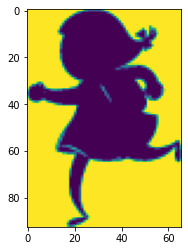

In [ ]:
#plt.figure(figsize=(16,16))
#plt.title("Background", fontsize=18)
#plt.imshow(background);

#rgb to gray:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.figure(figsize=(16,7))
#plt.title("Background", fontsize=18)
#gray to binary
ret,thresh_img = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
#plt.figure(figsize=(16,7))
#plt.title("Background", fontsize=18)
#plt.imshow(thresh_img)
mask=thresh_img

#fig, ax = plt.subplots(1, 2, figsize=(16, 7))
#ax[0].imshow(img)
#ax[0].set_title('Object', fontsize=18)
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 200)
height = int(img.shape[0] * scale_percent / 200)
dim = (width, height)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',img.shape)
#plt.figure(figsize=(7,7))
#plt.title("Background", fontsize=18)
#plt.imshow(img);

#ax[1].imshow(mask)
#ax[1].set_title('Mask', fontsize=18);
scale_percent = 60 # percent of original size
width = int(mask.shape[1] * scale_percent / 200)
height = int(mask.shape[0] * scale_percent / 200)
dim = (width, height)
# resize image
mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',mask.shape)
#plt.figure(figsize=(7,7))
#plt.title("Background", fontsize=18)
#plt.imshow(mask);


In [ ]:
def add_obj(background, img, mask, x, y):
    '''
    Arguments:
    background - background image in CV2 RGB format
    img - image of object in CV2 RGB format
    mask - mask of object in CV2 RGB format
    x, y - coordinates of the center of the object image
    0 < x < width of background
    0 < y < height of background

    Function returns background with added object in CV2 RGB format

    CV2 RGB format is a numpy array with dimensions width x height x 3
    '''

    bg = background.copy()

    h_bg, w_bg = bg.shape[0], bg.shape[1]

    h, w = img.shape[0], img.shape[1]

    # Calculating coordinates of the top left corner of the object image
    x = x - int(w/2)
    y = y - int(h/2)

    mask_boolean = mask[:,:] == 0
    mask_rgb_boolean = np.stack([mask_boolean, mask_boolean, mask_boolean], axis=2)

    if x >= 0 and y >= 0:

        h_part = h - max(0, y+h-h_bg) # h_part - part of the image which overlaps background along y-axis
        w_part = w - max(0, x+w-w_bg) # w_part - part of the image which overlaps background along x-axis

        bg[y:y+h_part, x:x+w_part, :] = bg[y:y+h_part, x:x+w_part, :] * ~mask_rgb_boolean[0:h_part, 0:w_part, :] + (img * mask_rgb_boolean)[0:h_part, 0:w_part, :]

    elif x < 0 and y < 0:

        h_part = h + y
        w_part = w + x

        bg[0:0+h_part, 0:0+w_part, :] = bg[0:0+h_part, 0:0+w_part, :] * ~mask_rgb_boolean[h-h_part:h, w-w_part:w, :] + (img * mask_rgb_boolean)[h-h_part:h, w-w_part:w, :]

    elif x < 0 and y >= 0:

        h_part = h - max(0, y+h-h_bg)
        w_part = w + x

        bg[y:y+h_part, 0:0+w_part, :] = bg[y:y+h_part, 0:0+w_part, :] * ~mask_rgb_boolean[0:h_part, w-w_part:w, :] + (img * mask_rgb_boolean)[0:h_part, w-w_part:w, :]

    elif x >= 0 and y < 0:

        h_part = h + y
        w_part = w - max(0, x+w-w_bg)

        bg[0:0+h_part, x:x+w_part, :] = bg[0:0+h_part, x:x+w_part, :] * ~mask_rgb_boolean[h-h_part:h, 0:w_part, :] + (img * mask_rgb_boolean)[h-h_part:h, 0:w_part, :]

    return bg

(93, 66, 3)
(750, 1200, 3)


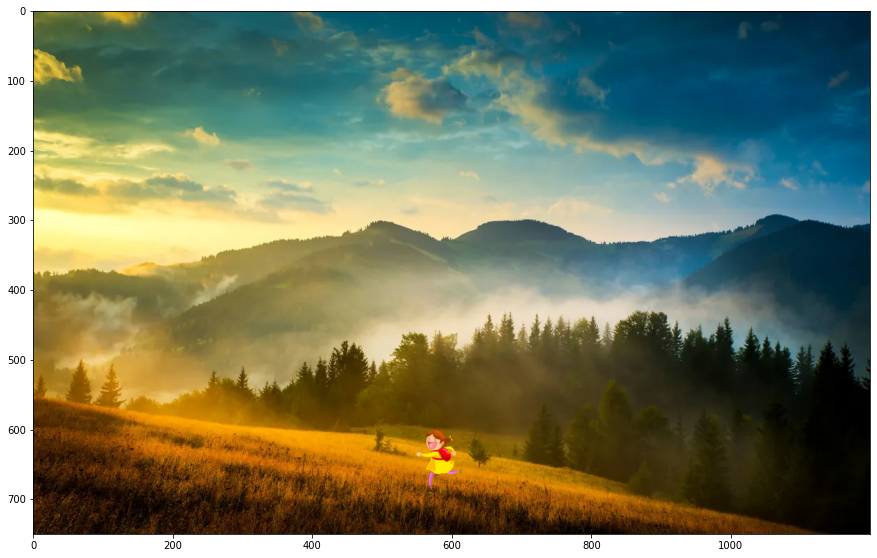

In [ ]:
print(img.shape)
print(background.shape)
composition_1 = add_obj(background, img, mask, n, m)
plt.figure(figsize=(15,15))
plt.imshow(composition_1)

#revisions

In [ ]:
img = cv2.imread('/content/drive/MyDrive/moon.jpg', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 200)
height = int(img.shape[0] * scale_percent / 200)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

plt.figure(figsize=(7,7))
plt.title("Background", fontsize=18)
plt.imshow(resized);


In [ ]:
import PIL.Image, PIL.ImageFilter
import matplotlib.pyplot as plt
im = PIL.Image.open('/content/drive/MyDrive/mrbean.jpg')
im2 = im.filter(PIL.ImageFilter.BLUR)
plt.figure(figsize=(16,16))
plt.title("Background", fontsize=18)
plt.imshow(im2)

In [ ]:
from PIL import Image
 color_image = Image.open('/content/drive/MyDrive/mrbean.jpg')
   bw = color_image.convert('L')

IndentationError: ignored

In [ ]:
from PIL import Image

def black_and_white(input_image_path,
    output_image_path):
   color_image = Image.open(input_image_pat)
   bw = color_image.convert('L')
   bw.save(output_image_path)

if __name__ == '__main__':
    black_and_white('caterpillar.jpg',
        'bw_caterpillar.jpg')